# Introduction

Anomaly detection is a machine learning technique used to identify patterns in data that do not conform to expected behavior. These unexpected patterns are referred to as anomalies or outliers. Anomalies may indicate errors or fraud in the data, or they may represent unusual or interesting phenomena that warrant further investigation. Anomaly detection can be applied to a wide range of domains, including finance, cybersecurity, medical diagnosis, and predictive maintenance. There are many different methods for detecting anomalies, such as statistical approaches, clustering algorithms, and deep learning models.

Some of the most popular methods for anomaly detection include Principal Component Analysis (PCA), K-Nearest Neighbors, Isolation Forest and Ensemble methods. One popular method of Deep Learning for anomaly detection is using **Autoencoders**, which are neural networks that learn to encode and decode data. Autoencoders can be trained on a dataset of normal, non-anomalous data, and then used to identify anomalies in new data that do not match the learned patterns. Evaluation of anomaly detection models can be challenging, as anomalies are often rare events and may not be well-represented in the training data. Common evaluation metrics include precision, recall, and F1-score, and cross-validation can be used to estimate model performance on unseen data.

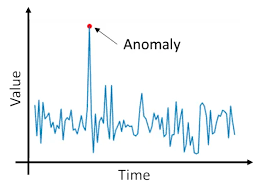

Anomaly detection is a powerful technique for identifying unexpected patterns in data and can provide valuable insights for many applications. However, it is important to carefully consider the limitations and assumptions of the chosen method, and to thoroughly evaluate the performance of the model on real-world data.

## Why not PCA?

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining as much of the original variation as possible. It works by identifying the principal components of the data, which are the directions in which the data varies the most. These principal components are orthogonal to each other, and the first principal component captures the most variation in the data. PCA can also be used for anomaly detection. Anomalies in high-dimensional data can be difficult to detect due to the curse of dimensionality. PCA can be used to reduce the dimensionality of the data while retaining as much of the original variation as possible.

However, it's important to note that PCA assumes that the data is **linearly** related and that the principal components represent meaningful features. It may not be effective for highly nonlinear data or for data with complex relationships between the features. Additionally, PCA may not be effective for identifying rare anomalies if the normal pattern dominates the data.

## Say hello to - Autoencoders

Autoencoders are a type of neural network architecture that can be used for unsupervised learning, dimensionality reduction, and data compression. The goal of an autoencoder is to learn a compressed representation of the input data by encoding the input into a lower-dimensional representation, and then decoding the representation back into the original input.

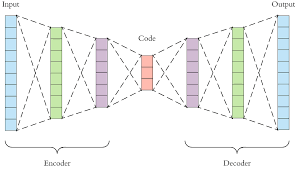

Autoencoders consist of three main components: an encoder, a hidden layer(CODE) and a decoder. The encoder maps the input data to a lower-dimensional representation, while the decoder maps the lower-dimensional representation back to the original input data. The hidden layer or Code, is the lower dimension representation of the input data. During training, the network learns to minimize the difference between the input and the reconstructed output, which encourages the network to learn a compressed representation of the input. One key benefit of autoencoders is their ability to capture complex patterns in the data, including **non-linear relationships** between the features. They can be used for a variety of applications, such as image compression, anomaly detection, and generating new data.

When training an **autoencoder for anomaly detection**, the goal is to learn a compressed representation of the normal data. This compressed representation should capture the typical patterns and relationships in the normal data, so that anomalies will be identified as data points that do not fit this pattern. Once the autoencoder has been trained on the normal data, we can use it to encode new data points and compare their reconstruction error to a threshold value. If the reconstruction error exceeds the threshold, the data point is considered an anomaly. By using the autoencoder in this way, we can identify anomalies in new data without having to explicitly label the anomalies in the training data.

<div class="alert alert-success" role="alert">
  <h3>In this Project:</h3>
    <ul>
        <li>EDA on Retail Transaction Datasets</li>
        <li>Building an Autoencoder model</li>
        <li>Evaluation and Testing of model for Classification of Fraud transacations</li>
    </ul>
</div>

# Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 10

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
from tensorflow.keras.metrics import Mean
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Loading Data

In [3]:
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### Shape of Dataset

In [6]:
print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 8
Samples: 1000000


### Checking for Null Values

In [8]:
any(df.isna().sum() > 0)

False

### Basic Statistics

In [10]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
cat_feats = [x for x in df.columns if len(df[x].unique()) <=2]
num_feats = [x for x in df.columns if x not in cat_feats]

# Exploratory Data Analysis

In [13]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

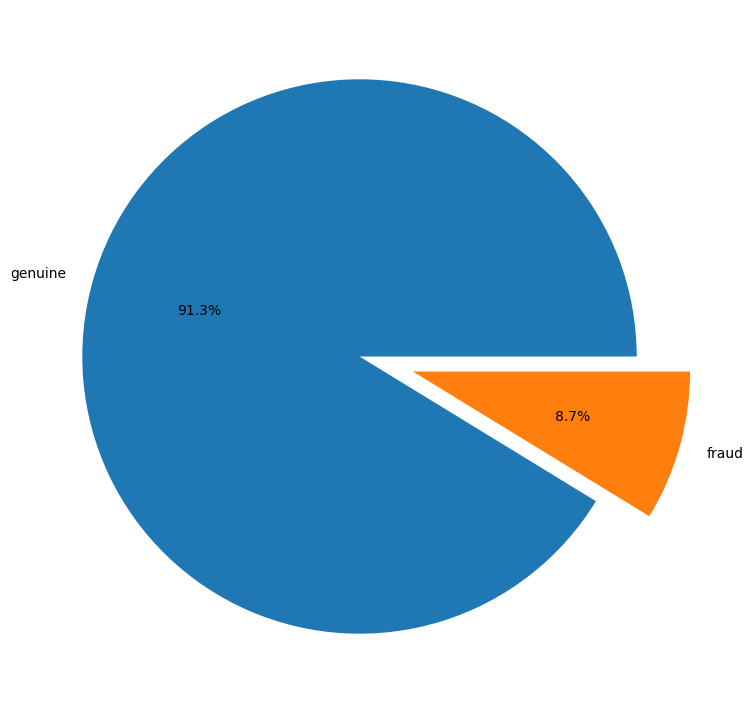

In [14]:
vc = df['fraud'].value_counts(ascending=False)

plt.pie(x=vc.values, labels=['genuine','fraud'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.show()

### Inferences
* The dataset is heavily **imbalanced**
* The autoencoders only require instances of `genuine` samples for training
* The `fraud` samples will be used for testing

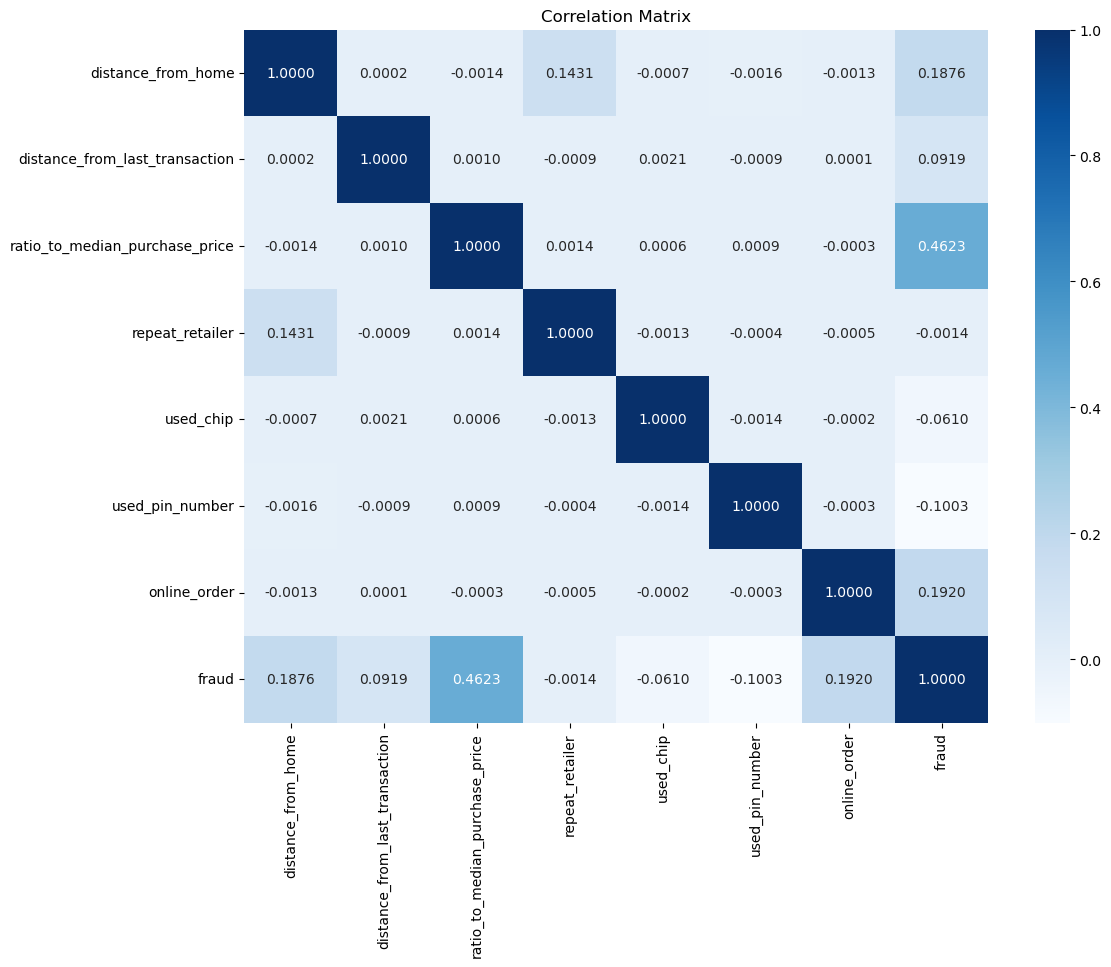

In [16]:
sns.heatmap(df.corr(), annot=True, fmt='.4f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

### Inferences
* Most correlation values are very close to 0, which indicates that our features are **weakly correlated**
* PCA assumes linearity in the data, and it does not work well with Non-linear features
* This is where **Autoencoders** prove to be useful, since they can capture the complex relationships in the data

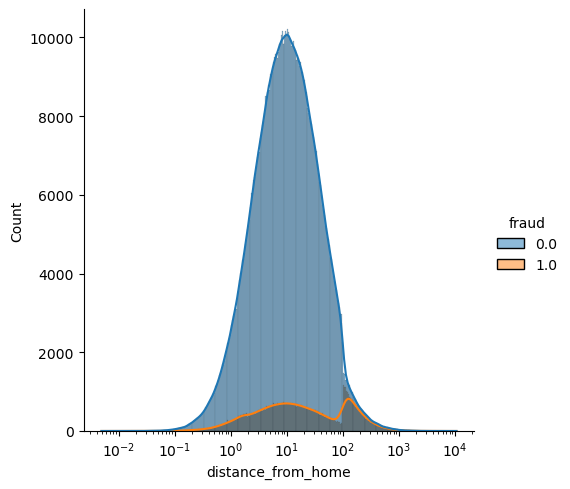

In [18]:
sns.displot(data=df, x='distance_from_home', hue='fraud', log_scale=True, kde=True)
plt.show()

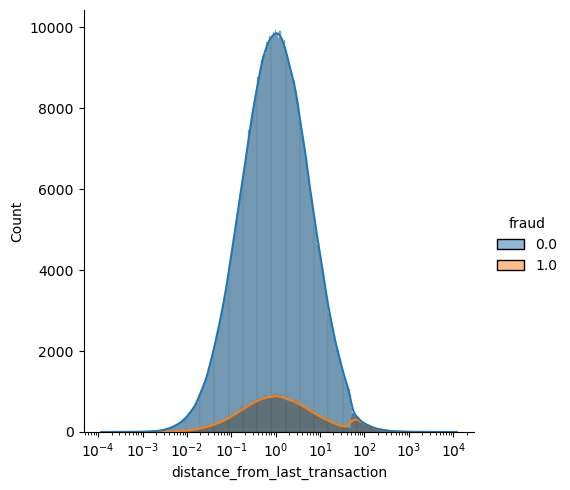

In [19]:
sns.displot(data=df, x='distance_from_last_transaction', hue='fraud', log_scale=True, kde=True)
plt.show()

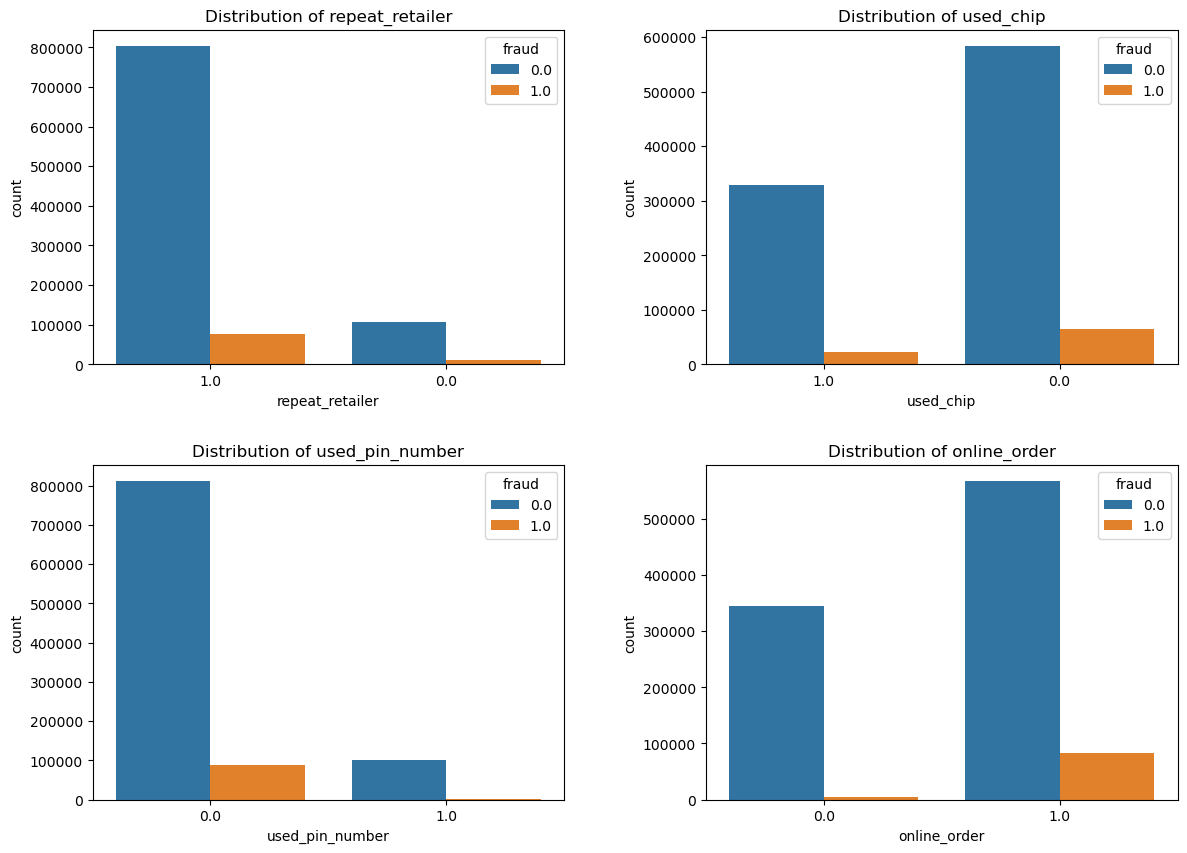

In [20]:
feats_to_plot = df.columns[3:-1]
plt.figure(figsize=(14,10))
for i, col in enumerate(feats_to_plot):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[col].astype(str), hue=df['fraud'])
    plt.title(f'Distribution of {col}')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

# Feature Engineering

In [22]:
ct = make_column_transformer(
    (StandardScaler(), num_feats)
)

df_scaled = pd.DataFrame(ct.fit_transform(df), columns=num_feats)
df_cat_feats = df[cat_feats]

df_concat = pd.concat([df_scaled, df_cat_feats], axis=1)
df_concat.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,0.0
3,-0.372854,0.021806,-0.522048,1.0,1.0,0.0,1.0,0.0
4,0.268572,-0.172968,0.142373,1.0,1.0,0.0,1.0,0.0


### For anomaly detection, we only need genuine class of the data

Since we want the model to only learn and fit on normal data, we only use the `genuine` class. This is to ensure that when an abnormal input is given to the model, its reconstruction error will be higher than that of a normal input. For testing of the model, samples from both the classes will be used.

In [24]:
X = df_concat.drop(['fraud'], axis=1)
y = df_concat['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

X_train_genuine = X_train[~y_train]
X_test_genuine = X_test[~y_test]

X_train_fraud = X_train[y_train]
X_test_fraud = X_test[y_test]

# Model Building - Autoencoder

### Architecture

* The encoder typically consists of one or more fully connected layers that transform the input data into a lower-dimensional representation. The number of nodes in the hidden layer is typically smaller than the number of nodes in the input and output layers, which forces the network to learn a compressed representation of the input data. The activation function used in the encoder can be any non-linear function, such as a sigmoid or a rectified linear unit (ReLU), which allows the network to capture non-linear relationships in the input data.

* The decoder is typically a mirror image of the encoder, with one or more fully connected layers that transform the compressed representation back into the original input space. The output layer of the decoder should have the same number of nodes as the input layer, so that the decoder can produce a reconstruction of the input data. The activation function used in the decoder is typically the same as the one used in the encoder.

In [330]:
CODE_DIM = 5
INPUT_SHAPE = X_train.shape[1]

input_layer = Input(shape=(INPUT_SHAPE,))
x = Dense(64, activation='relu')(input_layer)
x = Dense(16, activation='relu')(x)
code = Dense(CODE_DIM, activation='relu')(x)
x = Dense(16, activation='relu')(code)
x = Dense(64, activation='relu')(x)
output_layer = Dense(INPUT_SHAPE, activation='relu')(x)

autoencoder = Model(input_layer, output_layer, name='anomaly')

### Model Callbacks

In [333]:
model_name = "anomaly.weights.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            save_weights_only=True,
                            verbose=1)
earlystopping = EarlyStopping(monitor='val_loss',
                              min_delta = 0, 
                              patience = 5, 
                              verbose = 1,
                              restore_best_weights=True)

callbacks = [checkpoint, earlystopping]

### Compilation

In [335]:
autoencoder.compile(loss='mae',
                    optimizer=Adam())

### Training

In [337]:
X_train_gen, X_val_gen = train_test_split(X_train_genuine,
                                          test_size=0.1,
                                          random_state=42)
history = autoencoder.fit(X_train_gen, X_train_gen,
                          epochs=25, batch_size=64,
                          validation_data=(X_val_gen, X_val_gen),
                          callbacks=callbacks, shuffle=True)

Epoch 1/25
10245/10267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1563
Epoch 1: val_loss improved from inf to 0.14221, saving model to anomaly.weights.h5
10267/10267 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.1563 - val_loss: 0.1422
Epoch 2/25
10248/10267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1415
Epoch 2: val_loss improved from 0.14221 to 0.14195, saving model to anomaly.weights.h5
10267/10267 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1415 - val_loss: 0.1419
Epoch 3/25
10261/10267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1413
Epoch 3: val_loss improved from 0.14195 to 0.14183, saving model to anomaly.weights.h5
10267/10267 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1413 - val_loss: 0.1418
Epoch 4/25
10244/10267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1411
Epoch 4: val_loss did not improve from 0.14183
10267/10267 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1411 - val_loss: 0.1419
Epoch 5/25
10238/10267 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1410
Epoch 5: val_loss imp

### Results

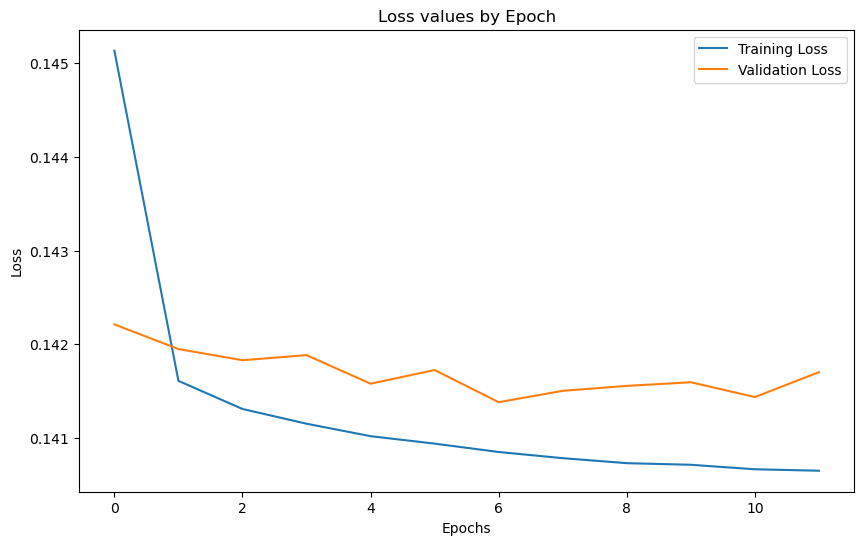

In [339]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss values by Epoch")
plt.show()

# Reconstruction

It refers to the process of using the learned compressed representation of the input data to generate a reconstruction of the original input. The reconstruction is generated by passing the compressed representation through the decoder portion of the autoencoder. The goal of the autoencoder is to learn a compressed representation of the input data that can be used to generate accurate reconstructions of the original input.

![reconstruction](https://miro.medium.com/v2/resize:fit:777/1*ce89U6z-MhgGRln9VRAMxQ.png)

Here, `x-x'` represents the **Reconstruction Error**. 

We will start by making a prediction on the test set which consists of both classes. After this, we can define a threshold and a metric, depending upon the need. The idea is simple:
* If the Reconstruction error is lower than the threshold, the sample is `genuine`
* If the Reconstruction error is higher than the threshold, the sample is `fraud`

This is because the model was trained with samples of `genuine` class, so anything outside of this threshold is considered an anomaly.

In [341]:
reconstructions = autoencoder.predict(X_test, verbose=0)
reconstruction_error = mae(reconstructions, X_test)

### Create Dataframe with `reconstruction error` and `true` labels

In [343]:
recons_df = pd.DataFrame({
    'error': reconstruction_error,
    'y_true': y_test
}).reset_index(drop=True)
recons_df.head()

,error,y_true
0,0.115425,False
1,0.060568,False
2,0.280416,True
3,0.091777,False
4,0.148510,False


### Finding the Ideal Threshold

Choosing the right threshold is crucial in anomaly detection with autoencoders because it determines the tradeoff between detecting anomalies and generating false positives. The threshold determines the cutoff point for the reconstruction error, above which a data point is classified as anomalous. If the threshold is set too low, the autoencoder will classify many normal data points as anomalies, resulting in a high false positive rate. On the other hand, if the threshold is set too high, the autoencoder may miss some true anomalies, resulting in a high false negative rate.

The metric we will choose for this problem is Recall, as we want to reduce False Negatives. Any Fraud transcation classified as Genuine may lead to unnoticed problems in the system, since there will never be anomaly detected. To find the right threshold value, several values will be tested to find the best combination of metrics. While our goal is to improve Recall, we will also keep track of the accuracy. The tested values will be percentiles of the reconstruction error values.  

In [345]:
def thresholdTuning(df, iterations):
    
    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': []
    }
    
    for i in range(iterations):
        thresh_value = df['error'].quantile(i/iterations)
        preds = df['error'] > thresh_value
        cr = classification_report(df['y_true'], preds, output_dict=True)
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']
        
        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)
        
        print(f"Threshold: {thresh_value:.4f}\tAccuracy: {acc:.3f}\t\tPrecision: {prec:.3f}\tRecall Score: {rc:.3f}")
        
    return pd.DataFrame(thresh_df)
        
thresh_df = thresholdTuning(recons_df, 10)

Threshold: 0.0011	Accuracy: 0.087		Precision: 0.544	Recall Score: 0.500
Threshold: 0.0639	Accuracy: 0.177		Precision: 0.519	Recall Score: 0.522
Threshold: 0.0822	Accuracy: 0.271		Precision: 0.528	Recall Score: 0.557
Threshold: 0.0952	Accuracy: 0.365		Precision: 0.535	Recall Score: 0.593
Threshold: 0.1073	Accuracy: 0.460		Precision: 0.544	Recall Score: 0.632
Threshold: 0.1201	Accuracy: 0.556		Precision: 0.556	Recall Score: 0.675
Threshold: 0.1344	Accuracy: 0.654		Precision: 0.574	Recall Score: 0.724
Threshold: 0.1503	Accuracy: 0.750		Precision: 0.601	Recall Score: 0.767
Threshold: 0.1941	Accuracy: 0.831		Precision: 0.631	Recall Score: 0.763
Threshold: 0.2727	Accuracy: 0.890		Precision: 0.666	Recall Score: 0.688


In [346]:
threshold = thresh_df[thresh_df['recall'] == thresh_df['recall'].max()]['threshold'].values[0]
print(f"Threshold with Maximum Recall: {threshold:.6f}")

Threshold with Maximum Recall: 0.150309


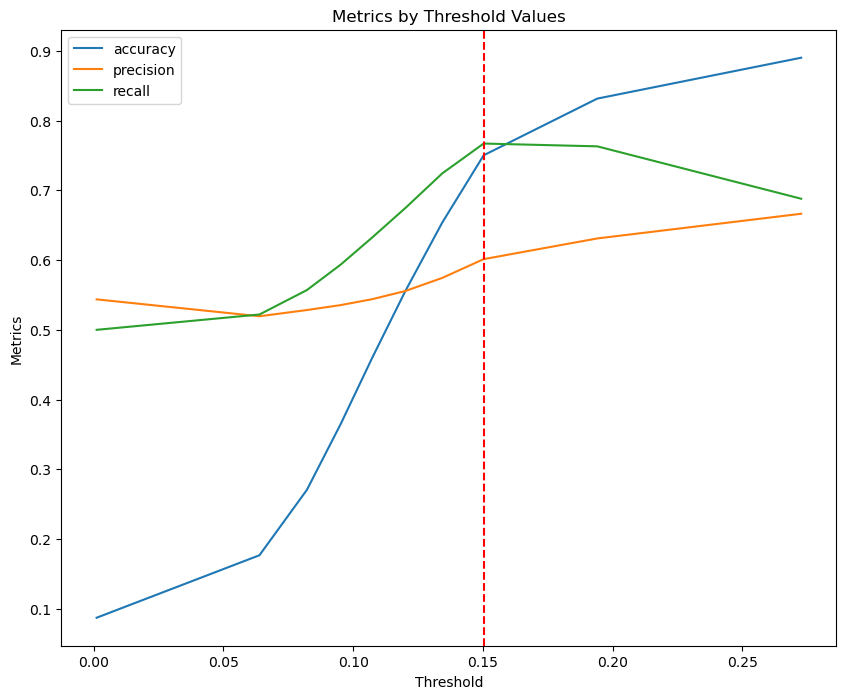

In [347]:
plt.figure(figsize=(10,8))
plt.plot(thresh_df['threshold'], thresh_df['accuracy'], label='accuracy')
plt.plot(thresh_df['threshold'], thresh_df['precision'], label='precision')
plt.plot(thresh_df['threshold'], thresh_df['recall'], label='recall')
plt.axvline(x=threshold, color='r', linestyle='dashed')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics by Threshold Values')
plt.legend()
plt.show()

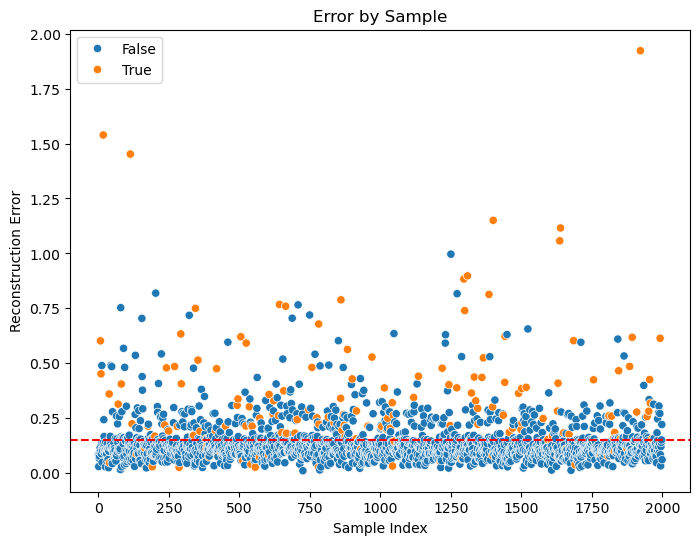

In [348]:
temp = recons_df.sample(frac=0.01, random_state=42).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=temp, x=temp.index, y='error', hue='y_true')
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Error by Sample')
plt.legend()
plt.show()

The red dashed line represents the threshold. Only 1% of testing data is plotted, for a clearer visualization. 
* Most blue markers (representing genuine transactions) are concentrated below the threshold
* Above the threshold, more orange markers appear, indicating fraud transactions

# Classification

In [351]:
recons_df['y_pred'] = recons_df['error'] > threshold
recons_df.head()

,error,y_true,y_pred
0,0.115425,False,False
1,0.060568,False,False
2,0.280416,True,True
3,0.091777,False,False
4,0.148510,False,False


In [354]:
print(classification_report(recons_df['y_true'],recons_df['y_pred']))

              precision    recall  f1-score   support

       False       0.97      0.75      0.85    182538
        True       0.23      0.79      0.36     17462

    accuracy                           0.75    200000
   macro avg       0.60      0.77      0.60    200000
weighted avg       0.91      0.75      0.80    200000



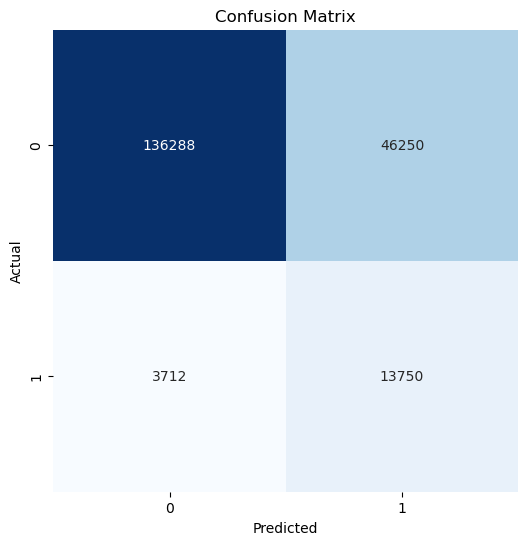

In [355]:
cm = confusion_matrix(recons_df['y_true'],recons_df['y_pred'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Results

In [309]:
print(f"Recall Score: {recall_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")
print(f"Accuracy Score: {accuracy_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")

Recall Score: 96.936%
Accuracy Score: 78.196%


<div class="alert alert-success" role="alert">
<h1>Conclusion</h1>
<p>In conclusion, anomaly detection is a critical task in many fields, including finance, healthcare, and cybersecurity. Autoencoders have emerged as a powerful tool for anomaly detection due to their ability to learn compressed representations of data and generate accurate reconstructions of the original input. By training an autoencoder on normal data and using it to reconstruct new data points, anomalies can be identified based on the magnitude of their reconstruction error. However, choosing the right threshold for the reconstruction error is crucial to balance the tradeoff between detecting anomalies and generating false positives. Overall, autoencoders provide a promising approach for anomaly detection that can be applied to a wide range of domains and applications.</p>   
<strong>Thats's all for this one. Please upvote and leave feedbacks. Thank you!</strong>
</div>